# EDA Credit Card Fraud

## Borja Fidalgo Martínez-Merello
### 30/10/2020

### Dataset
data/01_raw/creditcard.csv

### Descripción del Dataset


El Dataset `creditcard.csv` contiene transacciones realizadas con tarjetas de crédito en dos días de septiembre de 2013, por usuarios europeos. Contiene 492 observaciones con fraude de un total de 284.807 lo que representa un 0,172%.
Contiene 4 tipos de variables:
- __Time__: segundos transcurridos entre cada transacción y la primera transacción en el Dataset.
- __V1, V2, V3..V28__: Por confidencialidad, son componentes principales por Análisis de Componentes Principales (ACP)
- __Amount__: Importe de la transacción
- __Class__: 1 = fraude; 0 = no fraude

### Librerías

In [26]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

In [3]:
creditCard = pd.read_csv('data/01_raw.csv')

### Pandas `creditCard` profile report

In [ ]:
ccprofile = ProfileReport(creditCard, explorative=True)
#ccprofile.to_file("ccprofile.html")

Con el objetivo de agregar valor e ideas para el EDA se genenera un pandas profile report del DF `creditCard`. Facilitando el trabajo a realizar y añadiendo un soporte al análisis posterior.

## EDA

### Visualización

In [6]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Observamos el DF ofrecinedo una ligera idea de la composición y organización de los datos.

In [10]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos el contenido del dataset, totalmente uniforme y sencillo con todos los valores de tipo numérico.

### Valores nulos

In [12]:
creditCard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No hay valores nulos por lo que facilita el tratamiento y de los datos.

### Tiempo de fraude y no fraude

Aprovechando la caulidad sobre la variable dummy `Class` que indica en que transacciones ha habido fraude y las que no, visualizamos a través de la división del DF.

In [21]:
print ("Fraude")
print (creditCard.Time[creditCard.Class == 1].describe())
print ()
print ("No fraude")
print (creditCard.Time[creditCard.Class == 0].describe())

Fraude
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

No fraude
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


Vemos que los tiempos donde las transacciones han tenido fraude son de media inferiores a los que han tenido fraude. Un punto a analizar ya que se puede deber a multiples circunstancias.

### Histograma sobre tiempo en fraude y no fraude

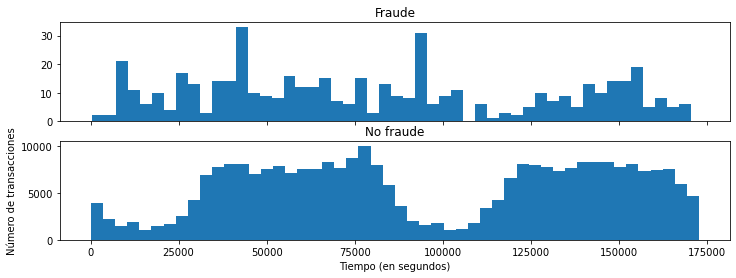

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(creditCard.Time[creditCard.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(creditCard.Time[creditCard.Class == 0], bins = bins)
ax2.set_title('No fraude')

plt.xlabel('Tiempo (en segundos)')
plt.ylabel('Número de transacciones')
plt.show()

Se puede observar como a pesar de la diferencia de escala debido al volumen en que periodo suceden los fraudes y las transacciones normales.

### Correlación Spearman´s

Gracias a la previa elaboración de `creditCard` Profile Report, se ha observado que para el análisis de correlación de Spearman´s es el que más información aporta ya que 

In [27]:
cCSpearman = creditCard.corr(method='spearman')

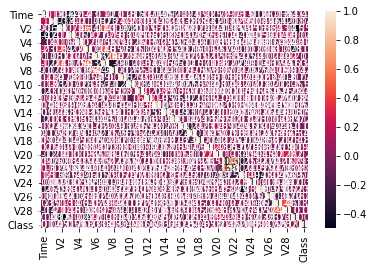

In [28]:
sns.heatmap(cCSpearman, annot = True)
plt.show()

Aplicamos correlación Spearman´s ya que se buscan correlaciones monotónicas no lineales, puesto que mediante r de Person, no es posible. Sus valor se encuentra entre 1 y -1, siendo -1 una correlación negativa monotónica, 0 no hay correlación monotónica y 1 indica correlación monotónica positiva total. Para poder observar el gráfico con mayor precisión, acudir a `creditCard` Profile Report.

### Bibliografía

- www.kaggle.com/mlg-ulb/creditcardfraud
- www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
- www.kaggle.com/currie32/predicting-fraud-with-tensorflow/data
- www.towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14